# Example of Pbnn class with synthetic data

In [1]:
from bayesian_models import Pbnn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Create the object 

In [2]:
# config = {"n_infeatures": *,
#           "n_outfeatures": *,
#           "n_samples": *,
#           "output_dist": "Normal", 
#           "learn_all_params": True, 
#           "fixed_param": None} 
config = {"n_infeatures": 1,
          "n_outfeatures": 1,
          "n_samples": 300,
          "learn_all_params": True,
          "fixed_param": 0.3} 

mybnn = Pbnn(config)
print(mybnn.n_infeatures)
print(mybnn.n_outfeatures)
print(mybnn.n_samples)
print(mybnn.output_dist)
print(mybnn.learn_all_params)
print(mybnn.fixed_param)

1
1
300
Normal
True
None


Build the network 

In [3]:
# Pbnn.build_bnn(n_hidden_layers=3, width_hidden_layers=[16,32,16])
mybnn.build_bnn(3,[16,32,16])

C:\Users\fdenolas\Miniconda3\envs\bnn\lib\site-packages\tensorflow_probability\python\layers\util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
C:\Users\fdenolas\Miniconda3\envs\bnn\lib\site-packages\tensorflow_probability\python\layers\util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_flipout (DenseFlipout  (None, 16)               64        
 )                                                               
                                                                 
 dense_flipout_1 (DenseFlipo  (None, 32)               1088      
 ut)                                                             
                                                                 
 dense_flipout_2 (DenseFlipo  (None, 16)               1056      
 ut)                                                             
                                                                 
 dense_flipout_3 (DenseFlipo  (None, 2)                68        
 ut)                                                         

Generate synthetic training data

In [4]:
def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return (x-5)**2 + epsilon
train_size = 300

X = np.geomspace(1, 10, train_size).reshape(-1, 1)
Y_true = f(X, sigma=0.0)
Y = np.zeros(X.shape)
for i in range(len(X)):
    x = X[i]
    if 4<x<10:
        Y[i] = f(x, sigma=abs(x)-4)
    else:
        Y[i] = f(x, sigma=0)        
print(X.shape)

(300, 1)


Train the network

In [5]:
# Pbnn.train_bnn(X,Y,train_env)
# X: * (n_samples, n_infeatures)
# Y: * (n_samples, n_infeatures)
# train_env = {"optimizer": optimizers.Adam,
#              "learning_rate": 0.001,
#              "batch_size": 64,
#              "epochs": 1000,
#              "callback_patience": 30, (For No callback, keep the patience the same as epochs)
#              "verbose": 0}

train_env = {"batch_size": 150,
             "epochs": 5000,
             "callback_patience": 1000,
             "verbose": 1}
mybnn.train_bnn(X,Y,train_env)

Epoch 1/5000
2/2 [==============================] - 2s 54ms/step - loss: 110.9565
Epoch 2/5000
2/2 [==============================] - 0s 3ms/step - loss: 111.3813
Epoch 3/5000
2/2 [==============================] - 0s 24ms/step - loss: 109.7914
Epoch 4/5000
2/2 [==============================] - 0s 4ms/step - loss: 110.1649
Epoch 5/5000
2/2 [==============================] - 0s 25ms/step - loss: 109.5614
Epoch 6/5000
2/2 [==============================] - 0s 3ms/step - loss: 109.6721
Epoch 7/5000
2/2 [==============================] - 0s 3ms/step - loss: 110.3029
Epoch 8/5000
2/2 [==============================] - 0s 3ms/step - loss: 110.1369
Epoch 9/5000
2/2 [==============================] - 0s 24ms/step - loss: 109.1543
Epoch 10/5000
2/2 [==============================] - 0s 3ms/step - loss: 109.8289
Epoch 11/5000
2/2 [==============================] - 0s 4ms/step - loss: 110.4216
Epoch 12/5000
2/2 [==============================] - 0s 3ms/step - loss: 109.1665
Epoch 13/5000
2/2 [==

2/2 [==============================] - 0s 25ms/step - loss: 18.8449
Epoch 101/5000
2/2 [==============================] - 0s 25ms/step - loss: 18.4918
Epoch 102/5000
2/2 [==============================] - 0s 27ms/step - loss: 18.2356
Epoch 103/5000
2/2 [==============================] - 0s 23ms/step - loss: 17.7211
Epoch 104/5000
2/2 [==============================] - 0s 3ms/step - loss: 18.0214
Epoch 105/5000
2/2 [==============================] - 0s 24ms/step - loss: 17.2186
Epoch 106/5000
2/2 [==============================] - 0s 27ms/step - loss: 17.0540
Epoch 107/5000
2/2 [==============================] - 0s 27ms/step - loss: 16.9795
Epoch 108/5000
2/2 [==============================] - 0s 25ms/step - loss: 16.6248
Epoch 109/5000
2/2 [==============================] - 0s 3ms/step - loss: 17.0651
Epoch 110/5000
2/2 [==============================] - 0s 3ms/step - loss: 16.6606
Epoch 111/5000
2/2 [==============================] - 0s 3ms/step - loss: 16.6323
Epoch 112/5000
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 12.6799
Epoch 200/5000
2/2 [==============================] - 0s 5ms/step - loss: 12.6850
Epoch 201/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.6215
Epoch 202/5000
2/2 [==============================] - 0s 4ms/step - loss: 12.6272
Epoch 203/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.8138
Epoch 204/5000
2/2 [==============================] - 0s 4ms/step - loss: 12.6525
Epoch 205/5000
2/2 [==============================] - 0s 30ms/step - loss: 12.5441
Epoch 206/5000
2/2 [==============================] - 0s 26ms/step - loss: 12.5048
Epoch 207/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.6745
Epoch 208/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.5455
Epoch 209/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.7041
Epoch 210/5000
2/2 [==============================] - 0s 3ms/step - loss: 12.5213
Epoch 211/5000
2/2 [=========

2/2 [==============================] - 0s 26ms/step - loss: 11.7228
Epoch 299/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.7761
Epoch 300/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.9783
Epoch 301/5000
2/2 [==============================] - 0s 26ms/step - loss: 11.7066
Epoch 302/5000
2/2 [==============================] - 0s 27ms/step - loss: 11.6872
Epoch 303/5000
2/2 [==============================] - 0s 37ms/step - loss: 11.6343
Epoch 304/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.7693
Epoch 305/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.7563
Epoch 306/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.6700
Epoch 307/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.7286
Epoch 308/5000
2/2 [==============================] - 0s 6ms/step - loss: 11.7415
Epoch 309/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.7425
Epoch 310/5000
2/2 [=======

2/2 [==============================] - 0s 25ms/step - loss: 11.0239
Epoch 398/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.1232
Epoch 399/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.1143
Epoch 400/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.1565
Epoch 401/5000
2/2 [==============================] - 0s 24ms/step - loss: 11.0183
Epoch 402/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.1270
Epoch 403/5000
2/2 [==============================] - 0s 24ms/step - loss: 11.0174
Epoch 404/5000
2/2 [==============================] - 0s 4ms/step - loss: 11.1094
Epoch 405/5000
2/2 [==============================] - 0s 24ms/step - loss: 11.0110
Epoch 406/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.0551
Epoch 407/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.0417
Epoch 408/5000
2/2 [==============================] - 0s 3ms/step - loss: 11.0775
Epoch 409/5000
2/2 [=======

2/2 [==============================] - 0s 4ms/step - loss: 10.2462
Epoch 497/5000
2/2 [==============================] - 0s 4ms/step - loss: 10.3292
Epoch 498/5000
2/2 [==============================] - 0s 4ms/step - loss: 10.2216
Epoch 499/5000
2/2 [==============================] - 0s 3ms/step - loss: 10.2125
Epoch 500/5000
2/2 [==============================] - 0s 3ms/step - loss: 10.3456
Epoch 501/5000
2/2 [==============================] - 0s 25ms/step - loss: 10.2059
Epoch 502/5000
2/2 [==============================] - 0s 23ms/step - loss: 10.1815
Epoch 503/5000
2/2 [==============================] - 0s 3ms/step - loss: 10.1957
Epoch 504/5000
2/2 [==============================] - 0s 28ms/step - loss: 10.1152
Epoch 505/5000
2/2 [==============================] - 0s 5ms/step - loss: 10.2187
Epoch 506/5000
2/2 [==============================] - 0s 29ms/step - loss: 10.1004
Epoch 507/5000
2/2 [==============================] - 0s 4ms/step - loss: 10.1123
Epoch 508/5000
2/2 [=======

2/2 [==============================] - 0s 35ms/step - loss: 9.4241
Epoch 597/5000
2/2 [==============================] - 0s 40ms/step - loss: 9.3717
Epoch 598/5000
2/2 [==============================] - 0s 34ms/step - loss: 9.3521
Epoch 599/5000
2/2 [==============================] - 0s 6ms/step - loss: 9.3860
Epoch 600/5000
2/2 [==============================] - 0s 28ms/step - loss: 9.3309
Epoch 601/5000
2/2 [==============================] - 0s 3ms/step - loss: 9.3524
Epoch 602/5000
2/2 [==============================] - 0s 33ms/step - loss: 9.3213
Epoch 603/5000
2/2 [==============================] - 0s 4ms/step - loss: 9.3563
Epoch 604/5000
2/2 [==============================] - 0s 3ms/step - loss: 9.3749
Epoch 605/5000
2/2 [==============================] - 0s 4ms/step - loss: 9.3591
Epoch 606/5000
2/2 [==============================] - 0s 4ms/step - loss: 9.3320
Epoch 607/5000
2/2 [==============================] - 0s 25ms/step - loss: 9.2590
Epoch 608/5000
2/2 [=================

Epoch 697/5000
2/2 [==============================] - 0s 25ms/step - loss: 8.5715
Epoch 698/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.7079
Epoch 699/5000
2/2 [==============================] - 0s 24ms/step - loss: 8.5092
Epoch 700/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.6000
Epoch 701/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5457
Epoch 702/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5926
Epoch 703/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5112
Epoch 704/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5428
Epoch 705/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5677
Epoch 706/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5445
Epoch 707/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5348
Epoch 708/5000
2/2 [==============================] - 0s 3ms/step - loss: 8.5994
Epoch 709/5000
2/2 [======

2/2 [==============================] - 0s 3ms/step - loss: 7.9200
Epoch 798/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.9024
Epoch 799/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.9286
Epoch 800/5000
2/2 [==============================] - 0s 28ms/step - loss: 7.8571
Epoch 801/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.8814
Epoch 802/5000
2/2 [==============================] - 0s 23ms/step - loss: 7.8430
Epoch 803/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.9487
Epoch 804/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.8868
Epoch 805/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.8455
Epoch 806/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.9484
Epoch 807/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.9170
Epoch 808/5000
2/2 [==============================] - 0s 24ms/step - loss: 7.8233
Epoch 809/5000
2/2 [====================

Epoch 898/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3274
Epoch 899/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3208
Epoch 900/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3702
Epoch 901/5000
2/2 [==============================] - 0s 24ms/step - loss: 7.2745
Epoch 902/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3631
Epoch 903/5000
2/2 [==============================] - 0s 5ms/step - loss: 7.3743
Epoch 904/5000
2/2 [==============================] - 0s 6ms/step - loss: 7.2958
Epoch 905/5000
2/2 [==============================] - 0s 4ms/step - loss: 7.3134
Epoch 906/5000
2/2 [==============================] - 0s 5ms/step - loss: 7.3309
Epoch 907/5000
2/2 [==============================] - 0s 6ms/step - loss: 7.3842
Epoch 908/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3019
Epoch 909/5000
2/2 [==============================] - 0s 3ms/step - loss: 7.3380
Epoch 910/5000
2/2 [=======

2/2 [==============================] - 0s 3ms/step - loss: 6.7873
Epoch 999/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.7765
Epoch 1000/5000
2/2 [==============================] - 0s 30ms/step - loss: 6.6807
Epoch 1001/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.7901
Epoch 1002/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.7850
Epoch 1003/5000
2/2 [==============================] - 0s 5ms/step - loss: 6.7876
Epoch 1004/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.6930
Epoch 1005/5000
2/2 [==============================] - 0s 72ms/step - loss: 6.6780
Epoch 1006/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.8237
Epoch 1007/5000
2/2 [==============================] - 0s 4ms/step - loss: 6.6974
Epoch 1008/5000
2/2 [==============================] - 0s 7ms/step - loss: 6.8147
Epoch 1009/5000
2/2 [==============================] - 0s 4ms/step - loss: 6.6989
Epoch 1010/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 6.2786
Epoch 1098/5000
2/2 [==============================] - 0s 24ms/step - loss: 6.2509
Epoch 1099/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.2818
Epoch 1100/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.3763
Epoch 1101/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.3665
Epoch 1102/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.2916
Epoch 1103/5000
2/2 [==============================] - 0s 2ms/step - loss: 6.2655
Epoch 1104/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.2561
Epoch 1105/5000
2/2 [==============================] - 0s 24ms/step - loss: 6.2072
Epoch 1106/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.2575
Epoch 1107/5000
2/2 [==============================] - 0s 3ms/step - loss: 6.2383
Epoch 1108/5000
2/2 [==============================] - 0s 28ms/step - loss: 6.1977
Epoch 1109/5000
2/2 [========

2/2 [==============================] - 0s 3ms/step - loss: 5.8795
Epoch 1197/5000
2/2 [==============================] - 0s 4ms/step - loss: 5.9253
Epoch 1198/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8574
Epoch 1199/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8541
Epoch 1200/5000
2/2 [==============================] - 0s 4ms/step - loss: 5.8813
Epoch 1201/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8075
Epoch 1202/5000
2/2 [==============================] - 0s 4ms/step - loss: 6.0014
Epoch 1203/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8387
Epoch 1204/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8369
Epoch 1205/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8481
Epoch 1206/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.9308
Epoch 1207/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.8469
Epoch 1208/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 5.4573
Epoch 1296/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.5271
Epoch 1297/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.5205
Epoch 1298/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.6135
Epoch 1299/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.5705
Epoch 1300/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.4464
Epoch 1301/5000
2/2 [==============================] - 0s 24ms/step - loss: 5.3808
Epoch 1302/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.4537
Epoch 1303/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.4678
Epoch 1304/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.4735
Epoch 1305/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.4725
Epoch 1306/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.4070
Epoch 1307/5000
2/2 [==========

Epoch 1395/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.1573
Epoch 1396/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.2487
Epoch 1397/5000
2/2 [==============================] - 0s 2ms/step - loss: 5.2273
Epoch 1398/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.1097
Epoch 1399/5000
2/2 [==============================] - 0s 4ms/step - loss: 5.2620
Epoch 1400/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.0872
Epoch 1401/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.0722
Epoch 1402/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.1646
Epoch 1403/5000
2/2 [==============================] - 0s 4ms/step - loss: 5.1603
Epoch 1404/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.2587
Epoch 1405/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.1334
Epoch 1406/5000
2/2 [==============================] - 0s 3ms/step - loss: 5.1320
Epoch 1407/5000


2/2 [==============================] - 0s 3ms/step - loss: 4.8934
Epoch 1495/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8943
Epoch 1496/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8211
Epoch 1497/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8693
Epoch 1498/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8687
Epoch 1499/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8320
Epoch 1500/5000
2/2 [==============================] - 0s 23ms/step - loss: 4.7840
Epoch 1501/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8657
Epoch 1502/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8908
Epoch 1503/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8139
Epoch 1504/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.8363
Epoch 1505/5000
2/2 [==============================] - 0s 26ms/step - loss: 4.7755
Epoch 1506/5000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 4.5256
Epoch 1594/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5290
Epoch 1595/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5599
Epoch 1596/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.6020
Epoch 1597/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5909
Epoch 1598/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.5969
Epoch 1599/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.6257
Epoch 1600/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.6560
Epoch 1601/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5514
Epoch 1602/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5899
Epoch 1603/5000
2/2 [==============================] - 0s 23ms/step - loss: 4.4345
Epoch 1604/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.5313
Epoch 1605/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 4.3286
Epoch 1694/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.4144
Epoch 1695/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.3712
Epoch 1696/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.3572
Epoch 1697/5000
2/2 [==============================] - 0s 23ms/step - loss: 4.2693
Epoch 1698/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.2980
Epoch 1699/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.3072
Epoch 1700/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.2811
Epoch 1701/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.2709
Epoch 1702/5000
2/2 [==============================] - 0s 23ms/step - loss: 4.2532
Epoch 1703/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.2795
Epoch 1704/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.2990
Epoch 1705/5000
2/2 [=========

Epoch 1793/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.0685
Epoch 1794/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.0742
Epoch 1795/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.0536
Epoch 1796/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.1292
Epoch 1797/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.0734
Epoch 1798/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.0752
Epoch 1799/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.1142
Epoch 1800/5000
2/2 [==============================] - 0s 2ms/step - loss: 4.1582
Epoch 1801/5000
2/2 [==============================] - 0s 26ms/step - loss: 4.0357
Epoch 1802/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.1168
Epoch 1803/5000
2/2 [==============================] - 0s 4ms/step - loss: 4.0810
Epoch 1804/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.1769
Epoch 1805/5000

2/2 [==============================] - 0s 2ms/step - loss: 3.8902
Epoch 1893/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.9466
Epoch 1894/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.8998
Epoch 1895/5000
2/2 [==============================] - 0s 24ms/step - loss: 3.8422
Epoch 1896/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.9258
Epoch 1897/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.8844
Epoch 1898/5000
2/2 [==============================] - 0s 3ms/step - loss: 4.0341
Epoch 1899/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.8843
Epoch 1900/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.9146
Epoch 1901/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.9044
Epoch 1902/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.8690
Epoch 1903/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.9142
Epoch 1904/5000
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 3.7303
Epoch 1993/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.8284
Epoch 1994/5000
2/2 [==============================] - 0s 25ms/step - loss: 3.7030
Epoch 1995/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.7038
Epoch 1996/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7515
Epoch 1997/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7737
Epoch 1998/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7932
Epoch 1999/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7645
Epoch 2000/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.8248
Epoch 2001/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7509
Epoch 2002/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7764
Epoch 2003/5000
2/2 [==============================] - 0s 24ms/step - loss: 3.6667
Epoch 2004/5000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 3.6309
Epoch 2093/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.5915
Epoch 2094/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.5738
Epoch 2095/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6924
Epoch 2096/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.6780
Epoch 2097/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6638
Epoch 2098/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6156
Epoch 2099/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6617
Epoch 2100/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6409
Epoch 2101/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.6863
Epoch 2102/5000
2/2 [==============================] - 0s 24ms/step - loss: 3.5664
Epoch 2103/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.7443
Epoch 2104/5000
2/2 [==========

Epoch 2192/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.5862
Epoch 2193/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.4683
Epoch 2194/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.4927
Epoch 2195/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.5100
Epoch 2196/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.5069
Epoch 2197/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.5916
Epoch 2198/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.5059
Epoch 2199/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.5199
Epoch 2200/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.4911
Epoch 2201/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.6363
Epoch 2202/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.5418
Epoch 2203/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.4915
Epoch 2204/5000


2/2 [==============================] - 0s 3ms/step - loss: 3.4796
Epoch 2292/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.4530
Epoch 2293/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3892
Epoch 2294/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3918
Epoch 2295/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.4565
Epoch 2296/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3778
Epoch 2297/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.4714
Epoch 2298/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.4076
Epoch 2299/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.4344
Epoch 2300/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.4799
Epoch 2301/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.5017
Epoch 2302/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3736
Epoch 2303/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 3.3100
Epoch 2392/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.5538
Epoch 2393/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3763
Epoch 2394/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.3156
Epoch 2395/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3260
Epoch 2396/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3482
Epoch 2397/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3141
Epoch 2398/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2977
Epoch 2399/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3123
Epoch 2400/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3113
Epoch 2401/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.3718
Epoch 2402/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2975
Epoch 2403/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 3.3039
Epoch 2492/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.2214
Epoch 2493/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.2043
Epoch 2494/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3727
Epoch 2495/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1800
Epoch 2496/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3344
Epoch 2497/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.3004
Epoch 2498/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2261
Epoch 2499/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2193
Epoch 2500/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2442
Epoch 2501/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.2702
Epoch 2502/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.2597
Epoch 2503/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 3.1209
Epoch 2592/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.2121
Epoch 2593/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1926
Epoch 2594/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.0923
Epoch 2595/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1768
Epoch 2596/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.2418
Epoch 2597/5000
2/2 [==============================] - 0s 26ms/step - loss: 3.0781
Epoch 2598/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1578
Epoch 2599/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2542
Epoch 2600/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.1811
Epoch 2601/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1292
Epoch 2602/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.0904
Epoch 2603/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 3.2924
Epoch 2692/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.0504
Epoch 2693/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0887
Epoch 2694/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.1014
Epoch 2695/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.2187
Epoch 2696/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.0868
Epoch 2697/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0544
Epoch 2698/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.0965
Epoch 2699/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2285
Epoch 2700/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.2035
Epoch 2701/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.2035
Epoch 2702/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.2195
Epoch 2703/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 3.0211
Epoch 2792/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9993
Epoch 2793/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.0289
Epoch 2794/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1084
Epoch 2795/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0211
Epoch 2796/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.0900
Epoch 2797/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.0471
Epoch 2798/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0811
Epoch 2799/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0559
Epoch 2800/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.0419
Epoch 2801/5000
2/2 [==============================] - 0s 4ms/step - loss: 3.1867
Epoch 2802/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9880
Epoch 2803/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.9566
Epoch 2892/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.0407
Epoch 2893/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9662
Epoch 2894/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9706
Epoch 2895/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9692
Epoch 2896/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9589
Epoch 2897/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9601
Epoch 2898/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9666
Epoch 2899/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9903
Epoch 2900/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.1087
Epoch 2901/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9499
Epoch 2902/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9642
Epoch 2903/5000
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 2.9367
Epoch 2992/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0184
Epoch 2993/5000
2/2 [==============================] - 0s 23ms/step - loss: 2.8609
Epoch 2994/5000
2/2 [==============================] - 0s 2ms/step - loss: 3.0129
Epoch 2995/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9227
Epoch 2996/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9400
Epoch 2997/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9259
Epoch 2998/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8836
Epoch 2999/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9388
Epoch 3000/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9213
Epoch 3001/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9606
Epoch 3002/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9736
Epoch 3003/5000
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 2.8762
Epoch 3092/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8311
Epoch 3093/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8815
Epoch 3094/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8885
Epoch 3095/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9205
Epoch 3096/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8893
Epoch 3097/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.9712
Epoch 3098/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9181
Epoch 3099/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0040
Epoch 3100/5000
2/2 [==============================] - 0s 25ms/step - loss: 2.7843
Epoch 3101/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9613
Epoch 3102/5000
2/2 [==============================] - 0s 3ms/step - loss: 3.0687
Epoch 3103/5000
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 2.8069
Epoch 3192/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8708
Epoch 3193/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.8395
Epoch 3194/5000
2/2 [==============================] - 0s 5ms/step - loss: 3.0338
Epoch 3195/5000
2/2 [==============================] - 0s 7ms/step - loss: 2.8642
Epoch 3196/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.9086
Epoch 3197/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.8025
Epoch 3198/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8466
Epoch 3199/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8010
Epoch 3200/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8759
Epoch 3201/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9397
Epoch 3202/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8620
Epoch 3203/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.8707
Epoch 3292/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7466
Epoch 3293/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.8244
Epoch 3294/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7630
Epoch 3295/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9281
Epoch 3296/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9391
Epoch 3297/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.8401
Epoch 3298/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.9036
Epoch 3299/5000
2/2 [==============================] - 0s 25ms/step - loss: 2.6902
Epoch 3300/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7896
Epoch 3301/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7385
Epoch 3302/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7151
Epoch 3303/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 2.7718
Epoch 3392/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7606
Epoch 3393/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.7101
Epoch 3394/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6819
Epoch 3395/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7875
Epoch 3396/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7931
Epoch 3397/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7602
Epoch 3398/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7454
Epoch 3399/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7702
Epoch 3400/5000
2/2 [==============================] - 0s 22ms/step - loss: 2.6593
Epoch 3401/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7669
Epoch 3402/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7260
Epoch 3403/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 2.7046
Epoch 3492/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6593
Epoch 3493/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7956
Epoch 3494/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6416
Epoch 3495/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7367
Epoch 3496/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7463
Epoch 3497/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6321
Epoch 3498/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7297
Epoch 3499/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7175
Epoch 3500/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6586
Epoch 3501/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.9042
Epoch 3502/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7147
Epoch 3503/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.7149
Epoch 3592/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7395
Epoch 3593/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7418
Epoch 3594/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6561
Epoch 3595/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6124
Epoch 3596/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6458
Epoch 3597/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7205
Epoch 3598/5000
2/2 [==============================] - 0s 23ms/step - loss: 2.5581
Epoch 3599/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6772
Epoch 3600/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7271
Epoch 3601/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6620
Epoch 3602/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6990
Epoch 3603/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 2.6246
Epoch 3692/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6429
Epoch 3693/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6537
Epoch 3694/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6590
Epoch 3695/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6666
Epoch 3696/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6032
Epoch 3697/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6802
Epoch 3698/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6495
Epoch 3699/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6589
Epoch 3700/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7439
Epoch 3701/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6895
Epoch 3702/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7238
Epoch 3703/5000
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 2.6181
Epoch 3792/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6060
Epoch 3793/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6476
Epoch 3794/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7735
Epoch 3795/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6765
Epoch 3796/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6430
Epoch 3797/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5602
Epoch 3798/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5657
Epoch 3799/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.7298
Epoch 3800/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5309
Epoch 3801/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5739
Epoch 3802/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6632
Epoch 3803/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.6350
Epoch 3892/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7986
Epoch 3893/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6248
Epoch 3894/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.5685
Epoch 3895/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5566
Epoch 3896/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5593
Epoch 3897/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5683
Epoch 3898/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6556
Epoch 3899/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5299
Epoch 3900/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5104
Epoch 3901/5000
2/2 [==============================] - 0s 23ms/step - loss: 2.4905
Epoch 3902/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6215
Epoch 3903/5000
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 2.6151
Epoch 3992/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6408
Epoch 3993/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5448
Epoch 3994/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5386
Epoch 3995/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.5994
Epoch 3996/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5105
Epoch 3997/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4730
Epoch 3998/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6223
Epoch 3999/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5213
Epoch 4000/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4938
Epoch 4001/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4928
Epoch 4002/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5167
Epoch 4003/5000
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 2.4920
Epoch 4092/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4894
Epoch 4093/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5590
Epoch 4094/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4547
Epoch 4095/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4644
Epoch 4096/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.8299
Epoch 4097/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6579
Epoch 4098/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6037
Epoch 4099/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6610
Epoch 4100/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5267
Epoch 4101/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5326
Epoch 4102/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4719
Epoch 4103/5000
2/2 [===========

2/2 [==============================] - 0s 4ms/step - loss: 2.4787
Epoch 4192/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4141
Epoch 4193/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4560
Epoch 4194/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.5380
Epoch 4195/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4801
Epoch 4196/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5986
Epoch 4197/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.5050
Epoch 4198/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4304
Epoch 4199/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4528
Epoch 4200/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5131
Epoch 4201/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4738
Epoch 4202/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7534
Epoch 4203/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.5469
Epoch 4292/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4613
Epoch 4293/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5876
Epoch 4294/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4939
Epoch 4295/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.5813
Epoch 4296/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4210
Epoch 4297/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6557
Epoch 4298/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5019
Epoch 4299/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4793
Epoch 4300/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4294
Epoch 4301/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4489
Epoch 4302/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4781
Epoch 4303/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.4490
Epoch 4392/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3769
Epoch 4393/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.7140
Epoch 4394/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4036
Epoch 4395/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4724
Epoch 4396/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6051
Epoch 4397/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.6271
Epoch 4398/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4822
Epoch 4399/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.4390
Epoch 4400/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4452
Epoch 4401/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.5130
Epoch 4402/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.3883
Epoch 4403/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.6914
Epoch 4492/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4682
Epoch 4493/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.3869
Epoch 4494/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3973
Epoch 4495/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6020
Epoch 4496/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3796
Epoch 4497/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4206
Epoch 4498/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4283
Epoch 4499/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4313
Epoch 4500/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4358
Epoch 4501/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5791
Epoch 4502/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.3588
Epoch 4503/5000
2/2 [===========

2/2 [==============================] - 0s 6ms/step - loss: 2.4788
Epoch 4592/5000
2/2 [==============================] - 0s 5ms/step - loss: 2.4684
Epoch 4593/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.4534
Epoch 4594/5000
2/2 [==============================] - 0s 6ms/step - loss: 2.5250
Epoch 4595/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4295
Epoch 4596/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4982
Epoch 4597/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3653
Epoch 4598/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3945
Epoch 4599/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5176
Epoch 4600/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3465
Epoch 4601/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3102
Epoch 4602/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3869
Epoch 4603/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.3767
Epoch 4692/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3547
Epoch 4693/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.2956
Epoch 4694/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.3867
Epoch 4695/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4023
Epoch 4696/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3283
Epoch 4697/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3499
Epoch 4698/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4673
Epoch 4699/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4018
Epoch 4700/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.2967
Epoch 4701/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4057
Epoch 4702/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4344
Epoch 4703/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.2736
Epoch 4792/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3402
Epoch 4793/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3028
Epoch 4794/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3872
Epoch 4795/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3356
Epoch 4796/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.2809
Epoch 4797/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4082
Epoch 4798/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4593
Epoch 4799/5000
2/2 [==============================] - 0s 4ms/step - loss: 2.3933
Epoch 4800/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4121
Epoch 4801/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2793
Epoch 4802/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3853
Epoch 4803/5000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 2.3093
Epoch 4892/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.2855
Epoch 4893/5000
2/2 [==============================] - 0s 23ms/step - loss: 2.2330
Epoch 4894/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4846
Epoch 4895/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.5599
Epoch 4896/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3159
Epoch 4897/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3486
Epoch 4898/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4127
Epoch 4899/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3332
Epoch 4900/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3656
Epoch 4901/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3633
Epoch 4902/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.6385
Epoch 4903/5000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 2.3841
Epoch 4992/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.4623
Epoch 4993/5000
2/2 [==============================] - 0s 2ms/step - loss: 2.2794
Epoch 4994/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3331
Epoch 4995/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2759
Epoch 4996/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3638
Epoch 4997/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3290
Epoch 4998/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.3374
Epoch 4999/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.2882
Epoch 5000/5000
2/2 [==============================] - 0s 3ms/step - loss: 2.4891
Training completed
Minimum loss:  2.2329931259155273


In [6]:
# Save the weights
# import pickle
# with open("test", "wb") as fp:   #Pickling
#     pickle.dump(mybnn.weights, fp)

# with open("test", "rb") as fp:   # Unpickling
#     b = pickle.load(fp)

Test the network

In [7]:
# Mean_Y, Stdv_Y = Pbnn.test_bnn(Xtest, nsim=100)
# Xtest: * (n_samples, n_infeatures)
# nsim: 100
# Mean_Y: Predicted value (n_samples, n_outfeatures) 
# Stdv_Y: Overall uncertainty (n_samples, n_outfeatures) 

Xtest = np.linspace(-5, 15, 50).reshape(-1, 1)
Ytest = f(Xtest, sigma=0.0)
Mean_Y, Stdv_Y = mybnn.test_bnn(Xtest)

2/2 [==============================] - 0s 3ms/step


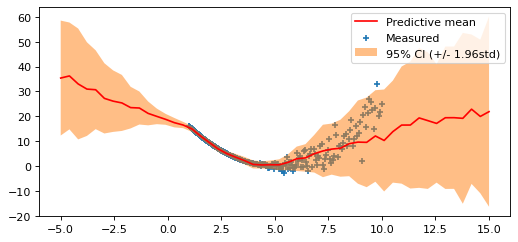

In [8]:
cm = 1/2.54 
fig, ax = plt.subplots(1, figsize=(17*cm, 8*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=.98, top=0.98, bottom=0.15, hspace = 0.65, wspace=0.15)
ax.plot(Xtest, Mean_Y , 'r-', label='Predictive mean');
ax.scatter(X,Y, marker='+', label='Measured');
ax.fill_between(np.squeeze(Xtest),np.squeeze(Mean_Y+1.96*Stdv_Y), np.squeeze(Mean_Y -1.96*Stdv_Y),
                 alpha=0.5, label='95% CI (+/- 1.96std)')
ax.legend()

Evaluate the network

In [9]:
# Mean_LL = Pbnn.test_bnn(Xtest, Ytest, nsim=100)
# Xtest: * (n_samples, n_infeatures)
# Ytest: * (n_samples, n_outfeatures)
# nsim: 100
# Mean_LL: Expected log-likelihood of the labels given the model (n_samples, n_outfeatures)  

Xtest = np.linspace(-5, 15, 50).reshape(-1, 1)
Ytest = f(Xtest, sigma=0.0)
Mean_LL = mybnn.evaluate_bnn(Xtest, Ytest)
print(np.mean(Mean_LL,axis=0))

[-9325.15720248]


Quantify model uncertainty

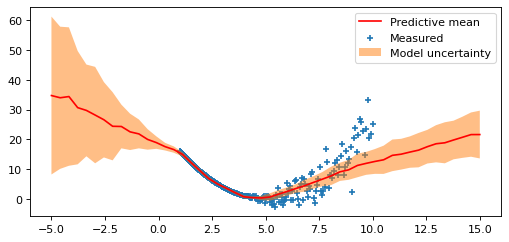

In [10]:
# Mean_muY, Stdv_muY, Mean_sigmaY, Stdv_sigmaY = Pbnn.model_bnn(Xtest, nsim=100)
# Xtest: * (n_samples, n_infeatures)
# nsim: 100
# Mean_muY: Predicted value (n_samples, n_outfeatures) 
# Stdv_muY: Model uncertatinty (n_samples, n_outfeatures) 
# Mean_sigmaY: Aleatory uncertainty (n_samples, n_outfeatures) 
# Stdv_sigmaY: Model uncertatinty (n_samples, n_outfeatures) 

Mean_muY, Stdv_muY, Mean_sigmaY, Stdv_sigmaY = mybnn.modeluq_bnn(Xtest, nsim=100)
fig, ax = plt.subplots(1, figsize=(17*cm, 8*cm), sharey='row', dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=0.1, right=.98, top=0.98, bottom=0.15, hspace = 0.65, wspace=0.15)
ax.plot(Xtest, Mean_muY , 'r-', label='Predictive mean');
ax.scatter(X,Y, marker='+', label='Measured');
ax.fill_between(np.squeeze(Xtest),np.squeeze(Mean_muY+1.96*Stdv_muY), np.squeeze(Mean_muY -1.96*Stdv_muY),
                 alpha=0.5, label='Model uncertainty')
ax.legend()